#ML Project

## Heart Failure Prediction 

###Group 10 -- Phase 2



####Name:    R.Rakesh
####Roll No.:AM.EN.U4AIE21052



##0. Importing Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time
from google.colab import files
from sklearn.metrics import confusion_matrix

%matplotlib inline

## 1. Importing Dataset

In [2]:
data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.shape

(299, 13)

##2. Reading Dataframe

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 3. Data Pre-Processing

In [4]:
data.isnull().sum()
#No null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

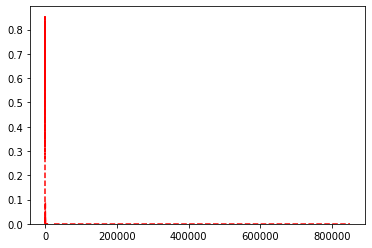

In [5]:
# Plot the histogram
plt.hist(data, bins=50, density=True)
# Calculate the mean and standard deviation of the data
mean = data.mean()
std = data.std()
# Plot the normal curve
x_ = np.linspace(data.min(), data.max(), 100)
plt.plot(x_, norm.pdf(x_, mean, std), "r--")

In [6]:
x=data[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets",	"serum_creatinine","serum_sodium","sex","smoking","time"]]
y=data[["DEATH_EVENT"]]
scaler = MinMaxScaler()
scaler.fit(x)
X = scaler.transform(x)

In [7]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [8]:
df={'age':X[:,0],'anaemia':X[:,1],'creatinine_phosphokinase':X[:,2],'diabetes':X[:,3],'ejection_fraction':X[:,4],'high_blood_pressure':X[:,5],'platelets':X[:,6],'serum_creatinine':X[:,7],"serum_sodium":X[:,8],'sex' :X[:,9],'smoking':X[:,10]}
data = pd.DataFrame(df)
data[["DEATH_EVENT"]]=y

In [9]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1


## 4. Data Summarization

In [10]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


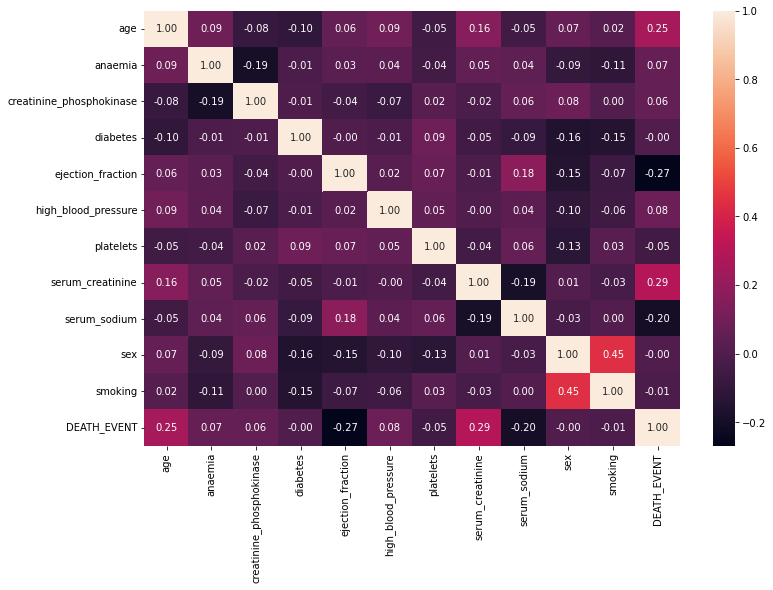

In [11]:
plt.figure(figsize= (12, 8))
sn.heatmap(data.corr(), annot=True, fmt='.2f')

## 5. Data Visualization

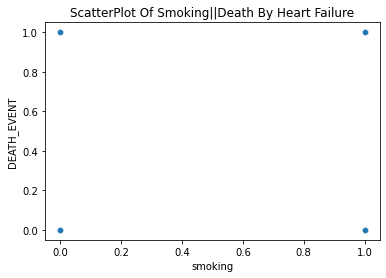

In [12]:
sn.scatterplot(x=data.iloc[:,10], y=data.iloc[:,11], data=data)
plt.title('ScatterPlot Of Smoking||Death By Heart Failure')
plt.show()

#no correlation b/w smoking and death in the dataset

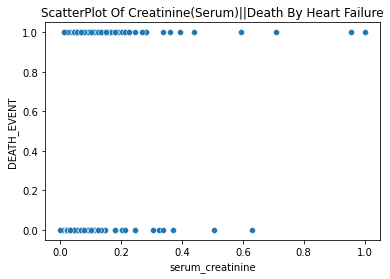

In [13]:
sn.scatterplot(x=data.iloc[:,7], y=data.iloc[:,11], data=data)
plt.title('ScatterPlot Of Creatinine(Serum)||Death By Heart Failure')
plt.show()

#Slight Positive Correlation Between Creatinine Levels & Deaths By Heart Failure

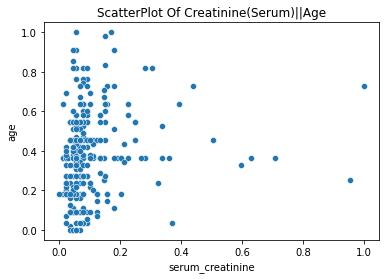

In [14]:
sn.scatterplot(x=data.iloc[:,7], y=data.iloc[:,0], data=data)
plt.title('ScatterPlot Of Creatinine(Serum)||Age')
plt.show()

#Slight Positive Correlation Between Creatinine Levels & Age

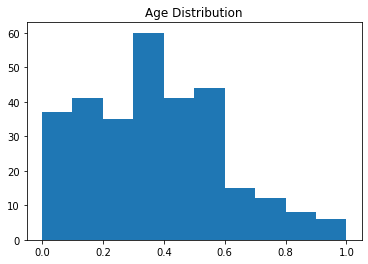

In [15]:
x = data['age']
plt.hist(x)
plt.title('Age Distribution')
plt.show()
#more data of people in age 50-60's


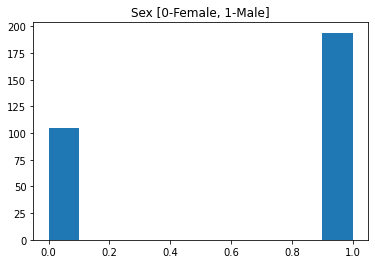

In [16]:
x = data['sex']
plt.hist(x)
plt.title('Sex [0-Female, 1-Male]')
plt.show()

#twice the amount of male data 

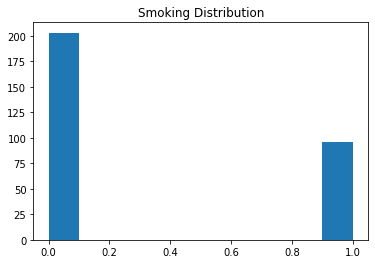

In [17]:
x = data['smoking']
plt.hist(x)
plt.title('Smoking Distribution')
plt.show()

#significantly more data of people who dont' smoke.

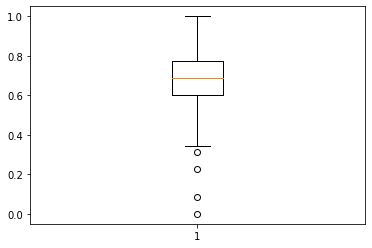

In [18]:
y=data['serum_sodium']
plt.boxplot(y)
plt.show()

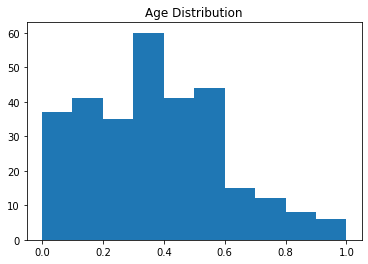

In [19]:
x = data['age']
plt.hist(x)
plt.title('Age Distribution')
plt.show()

## 6. Data Intrepretation 



*   Dataset contains **12 features** for predicting death events by **heart failure**.

*   Dataset contains **12 columns** and **300 rows**.

*   Features like 'time' in the dataset is not necessary and does not relate to death by heart failure. 'time' column is defined as the **follow up period (in days) after the data collection**, which does not contribute to the prediction, although a significant **negative correlation exist between Follow Up Time & Death.**

*   One of the major outliers is from the histogram of 'smoking', we can see a lot of data with people who doesn't smoke also no we can see from the correlation matrix that **no significant correlation exist between smoking & Death By Heart Failure.**

*   Recognizable positive correlations exist between *Creatinine Levels & Death* AND *Creatinine Levels & Age*. 

* More data is avaiable from the age range 40-60 years as we can see from the histogram of 'age'. 

* Double the data is available from Male Category than Female. 

### DATA SUMMARY

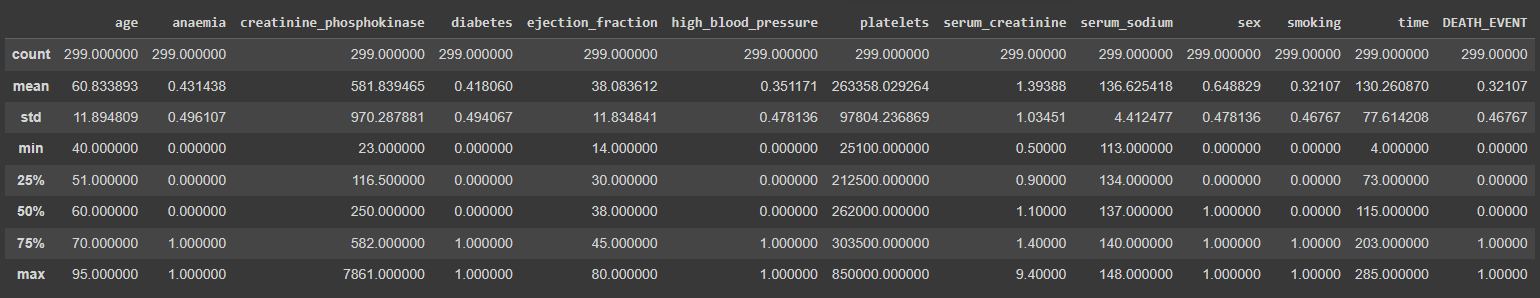


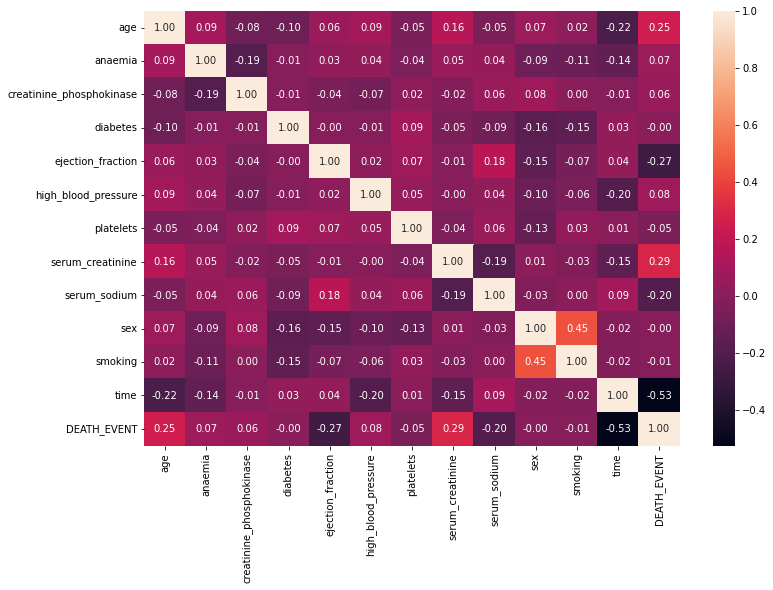










In [20]:
data.to_csv('heart_failure_clinical_records_dataset_cleaned.csv', encoding = 'utf-8-sig') 
files.download('heart_failure_clinical_records_dataset_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7. Python packages


####scikit-learn: This is one of the most widely-used machine learning libraries in Python. 



*  It includes an implementation of **k-NN algorithm** for classification and regression problems.

* It includes a variety of **logistic regression** implementations, including support for both L1 and L2 regularization.


* It includes an implementation of the popular CART (Classification and Regression Trees) algorithm for **decision tree learning**, along with tools for model evaluation and feature selection.










## 8. Learning Algorithms

### Logistic Regression:

Logistic Regression is a type of supervised machine learning algorithm used for classification tasks. It is a statistical method that is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

**logistic regression is a good choice when the goal is to create a simple, interpretable model for binary classification tasks, that can handle large datasets, missing data and multicollinearity, and when the decision boundary is linear.**


### Decision Tree : 

Decision tree is a type of supervised machine learning algorithm that is used for both classification and regression tasks. The algorithm works by creating a tree-like model of decisions and their possible consequences.

**Decision tree algorithm is a good choice whenever the goal is to create a simple, interpretable model that can handle both categorical and numerical data and can handle missing values and high dimensional data.**

### k-NN :

K-nearest neighbors (k-NN) is a type of supervised machine learning algorithm that is used for classification and regression tasks. The basic idea behind k-NN is that an object is classified or predicted based on the majority class or value of its k nearest neighbors.

**k-NN is a good choice when the goal is to create a model that can handle non-linear relationships, handle imbalanced datasets, noisy data, and small datasets. Additionally, k-NN is widely used in classification and regression tasks.**








## 9.Splitting Dataset Into Test,Train & Validation

In [21]:
# Select all columns except the last one as X
X = data.iloc[:, :-1]

# Select the last column as Y
y = data.iloc[:, -1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  #test, train dataset

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #Validation dataset

## 10. K Fold cross validation

### 1) Logistic Regression

In [24]:
#Grouped the DataFrame using loc function, so it most likely contains no consecutive indices, so 
#using iloc to fetch the training and validation data which provides integer-location based indexing, regardless of index values.

# Define the number of folds
num_folds = 5

# Define the model
log_reg = LogisticRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds)

# Initialize a list to store the scores
scores = []

# Iterate through the folds
for train_index, val_index in kf.split(X):
    # Get the training and validation data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]   #using iloc to fetch the training and validation data
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]   
    
    # Fit the model on the training data
    log_reg.fit(X_train, y_train.values.ravel())   
    # .values will give the values in a numpy array (shape: (n,1))
    # .ravel will convert that array shape to (n, ) (i.e. flatten it)
    
    # Evaluate the model on the validation data and append the score to the list
    score = log_reg.score(X_val, y_val)
    scores.append(score)

# Calculate the average score
avg_score = sum(scores) / num_folds
print("Average Score: ", avg_score)

Average Score:  0.6531073446327683


###2) Decision Tree

In [25]:
# Define the number of folds
num_folds = 5

# Define the model
tree = DecisionTreeClassifier()

# Create a KFold object
kf = KFold(n_splits=num_folds)

# Initialize a list to store the scores
scores = []

# Iterate through the folds
for train_index, val_index in kf.split(X):
    # Get the training and validation data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]   #using iloc to fetch the training and validation data
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the model on the training data
    tree.fit(X_train, y_train)
    
    # Evaluate the model on the validation data and append the score to the list
    score = tree.score(X_val, y_val)
    scores.append(score)

# Calculate the average score
avg_score = sum(scores) / num_folds
print("Average Score: ", avg_score)

Average Score:  0.6624293785310733


###3) K-NN

In [26]:
# Define the number of folds
num_folds = 5

# Define the model
knn = KNeighborsClassifier()

# Create a KFold object
kf = KFold(n_splits=num_folds)

# Initialize a list to store the scores
scores = []

# Iterate through the folds
for train_index, val_index in kf.split(X):
    # Get the training and validation data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index] #using iloc to fetch the training and validation data
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the model on the training data
    knn.fit(X_train, y_train.values.ravel())  # .values() will give the values in a numpy array (shape: (n,1))
                                              # .ravel() will convert that array shape to (n, ) (i.e. flatten it)
    
    # Make predictions on the validation data
    y_pred = knn.predict(X_val)
    
    # Calculate the accuracy score and append it to the list
    score = accuracy_score(y_val, y_pred)
    scores.append(score)

# Calculate the average score
avg_score = sum(scores) / num_folds
print("Average Accuracy Score: ", avg_score)

Average Accuracy Score:  0.6163841807909604


## 11.Creating models and estimating their accuracy for the following algorithms





### 1) Logistic Regression

In [36]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'lbfgs'],
              'max_iter': [100, 200, 300, 400, 500]}

# Create a logistic regression model
log_reg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy_log_reg = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_log_reg*100,'%')

#Get the precision, Recall & F1 Score 

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)


f1 = f1_score(y_test, y_pred)
print("F1-score: ", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Best Parameters:  {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy:  70.70707070707071 %
Precision:  0.7407407407407407
Recall:  0.47619047619047616
F1-score:  0.5797101449275363
[[50  7]
 [22 20]]


### 2) Decision Tree

In [37]:
# Create a decision tree model
tree = DecisionTreeClassifier()

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Calculate the accuracy of the model
accuracy_tree = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_tree*100,'%')

#Get the precision, recall & F1 Score
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score: ", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy:  93.93939393939394 %
Precision:  0.875
Recall:  1.0
F1-score:  0.9333333333333333
[[51  6]
 [ 0 42]]


### 3) K-NN

In [38]:
param_grid = {'n_neighbors': range(1, 30),
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3, 4, 5]}

# Create a KNN model
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_knn*100,'%')

#Get the precision, recall & F1 Score
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)


recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score: ", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Best Parameters:  {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Accuracy:  71.71717171717171 %
Precision:  1.0
Recall:  0.3333333333333333
F1-score:  0.5
[[57  0]
 [28 14]]


### Plotting Comparison Graph

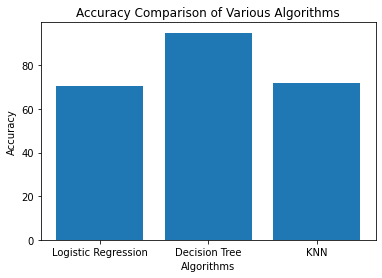

In [30]:
algorithms = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracies = [accuracy_log_reg*100, accuracy_tree*100, accuracy_knn*100]
plt.bar(algorithms, accuracies)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Various Algorithms')
plt.show()

## 12. Predictions on the validation dataset

### 1) Logistic Regression

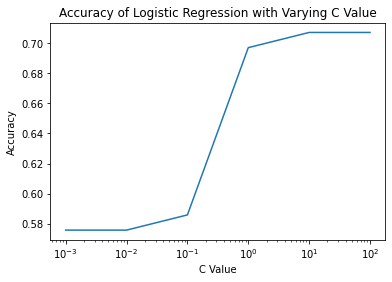

In [31]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize a list to store the accuracy scores
accuracies = []

# Iterate through the C values
for C in C_values:
    # Create a logistic regression model
    log_reg = LogisticRegression(C=C)

    # Fit the model on the training data
    log_reg.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = log_reg.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy scores against the C values
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression with Varying C Value')
plt.show()

### 2) Decision Trees

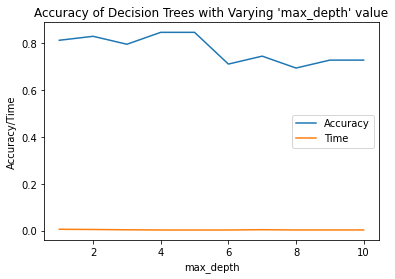

In [32]:
max_depth_range = range(1, 11)

# Initialize lists to store the accuracy and time for each max_depth
accuracies = []
times = []

# Iterate over the range of max_depth
for max_depth in max_depth_range:
    # Create a Decision Tree model
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Start the timer
    start_time = time.time()

    # Fit the model to the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the validation data
    y_val_pred = decision_tree.predict(X_val)

    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    # Stop the timer
    end_time = time.time()

    # Calculate the time taken
    time_taken = end_time - start_time
    times.append(time_taken)

# Plot the accuracy and time for each max_depth
plt.figure()
plt.plot(max_depth_range, accuracies, label='Accuracy')
plt.plot(max_depth_range, times, label='Time')
plt.xlabel('max_depth')
plt.ylabel('Accuracy/Time')
plt.title("Accuracy of Decision Trees with Varying 'max_depth' value")
plt.legend()
plt.show()

### 3) K-NN

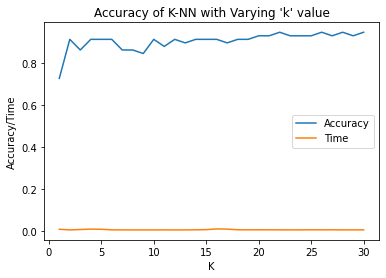

In [33]:
k_range = range(1, 31)

# Initialize lists to store the accuracy and time for each K
accuracies = []
times = []


for k in k_range:
    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Start the timer
    start_time = time.time()

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = knn.predict(X_val)

    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # Stop the timer
    end_time = time.time()

    # Calculate the time taken
    time_taken = end_time - start_time
    times.append(time_taken)

# Plot the accuracy and time for each K
plt.figure()
plt.plot(k_range, accuracies, label='Accuracy')
plt.plot(k_range, times, label='Time')
plt.xlabel('K')
plt.ylabel('Accuracy/Time')
plt.title("Accuracy of K-NN with Varying 'k' value")
plt.legend()
plt.show()

In [39]:
%%shell
jupyter nbconvert --to html /content/HeartFailure_Phase2_21052.ipynb

[NbConvertApp] Converting notebook /content/HeartFailure_Phase2_21052.ipynb to html
[NbConvertApp] Writing 794760 bytes to /content/HeartFailure_Phase2_21052.html
